In [ ]:
# Install required libraries
!pip install pandas gensim nltk pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_versio

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('synthetic_emails.csv')
df.head()

,email_id,subject,body
0,1,Project Update Meeting,"Dear Team, I hope this message finds you well...."
1,2,Customer Feedback Request,"Hello valued customer, Thank you for your rece..."
2,3,IT System Maintenance,"Dear Colleagues, The IT department will perfor..."
3,4,New Product Launch,"Hi Team, Exciting news! Our new product line w..."
4,5,Annual Performance Review,"Dear Employee, It is time for your annual perf..."


In [ ]:
texts = df['body'].tolist()


In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if len(word) > 3]
    return tokens

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Apply preprocessing
processed_texts = [preprocess_text(text) for text in texts]

In [ ]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

In [ ]:
# Evaluate LDA models for different numbers of topics
coherence_scores = []
perplexity_scores = []
topic_range = range(2, 21)  # Test 2 to 20 topics

for num_topics in topic_range:
    # Train LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                         random_state=42, passes=10, alpha='auto', eta='auto')

    # Calculate coherence score (c_v)
    coherence_model = CoherenceModel(model=lda_model, texts=processed_texts,
                                    dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

    # Calculate perplexity
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_scores.append(perplexity)

    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}, Perplexity: {perplexity:.4f}")


Num Topics: 2, Coherence Score: 0.2748, Perplexity: -5.8226
Num Topics: 3, Coherence Score: 0.3404, Perplexity: -5.8401
Num Topics: 4, Coherence Score: 0.3055, Perplexity: -5.8455
Num Topics: 5, Coherence Score: 0.3542, Perplexity: -5.8845
Num Topics: 6, Coherence Score: 0.3580, Perplexity: -5.8578
Num Topics: 7, Coherence Score: 0.4332, Perplexity: -5.9247
Num Topics: 8, Coherence Score: 0.3090, Perplexity: -5.9368
Num Topics: 9, Coherence Score: 0.3727, Perplexity: -5.9483
Num Topics: 10, Coherence Score: 0.4359, Perplexity: -5.9539
Num Topics: 11, Coherence Score: 0.3409, Perplexity: -5.9926
Num Topics: 12, Coherence Score: 0.3674, Perplexity: -6.0187
Num Topics: 13, Coherence Score: 0.3949, Perplexity: -6.0421
Num Topics: 14, Coherence Score: 0.3604, Perplexity: -6.0341
Num Topics: 15, Coherence Score: 0.4282, Perplexity: -6.0422
Num Topics: 16, Coherence Score: 0.4241, Perplexity: -6.1090
Num Topics: 17, Coherence Score: 0.4266, Perplexity: -6.0871
Num Topics: 18, Coherence Score:

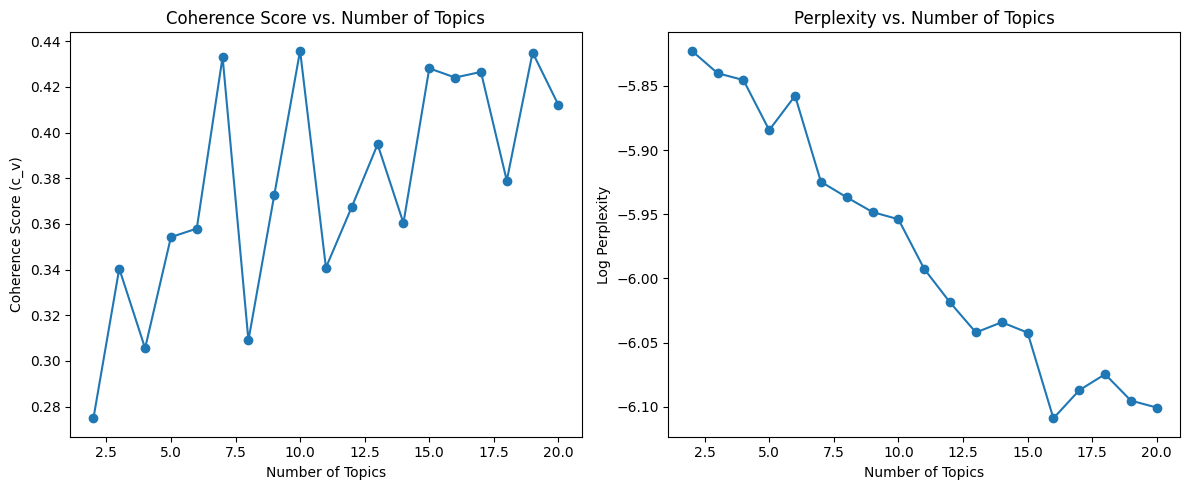

In [ ]:
# Plot coherence and perplexity
plt.figure(figsize=(12, 5))

# Plot coherence
plt.subplot(1, 2, 1)
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')
plt.title('Coherence Score vs. Number of Topics')

# Plot perplexity
plt.subplot(1, 2, 2)
plt.plot(topic_range, perplexity_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Log Perplexity')
plt.title('Perplexity vs. Number of Topics')

plt.tight_layout()
plt.show()

In [ ]:
# Find the optimal number of topics
optimal_topics = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics based on coherence: {optimal_topics}")

Optimal number of topics based on coherence: 10


In [ ]:
# Train final LDA model with optimal topics
final_lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_topics,
                           random_state=42, passes=10, alpha='auto', eta='auto')

# Display topics
topics = final_lda_model.print_topics(num_words=5)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")

Topic 0: 0.056*"team" + 0.034*"please" + 0.030*"next" + 0.029*"best" + 0.021*"prepare"
Topic 1: 0.040*"team" + 0.038*"dear" + 0.034*"product" + 0.033*"please" + 0.028*"feedback"
Topic 2: 0.035*"dear" + 0.033*"next" + 0.032*"team" + 0.028*"share" + 0.028*"intranet"
Topic 3: 0.043*"team" + 0.022*"please" + 0.021*"dear" + 0.021*"regard" + 0.019*"user"
Topic 4: 0.047*"security" + 0.037*"safety" + 0.037*"dear" + 0.034*"data" + 0.034*"regard"
Topic 5: 0.030*"next" + 0.027*"please" + 0.026*"team" + 0.026*"best" + 0.018*"review"
Topic 6: 0.050*"team" + 0.040*"best" + 0.040*"client" + 0.039*"please" + 0.025*"feedback"
Topic 7: 0.028*"team" + 0.028*"best" + 0.026*"please" + 0.024*"discus" + 0.022*"review"
Topic 8: 0.058*"event" + 0.026*"december" + 0.026*"dietary" + 0.026*"rsvp" + 0.023*"note"
Topic 9: 0.061*"team" + 0.034*"next" + 0.031*"dear" + 0.030*"intranet" + 0.026*"best"


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
# Function to get dominant topic for each document
def get_dominant_topic(lda_model, corpus, texts):
    dominant_topics = []
    for i, doc_bow in enumerate(corpus):
        # Get topic distribution for the document
        topic_dist = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        # Find the topic with the highest probability
        dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

In [ ]:
# Assign dominant topics
dominant_topics = get_dominant_topic(final_lda_model, corpus, processed_texts)

# Add dominant topic to the DataFrame
df['dominant_topic'] = dominant_topics


In [ ]:
# Map topic numbers to interpretable labels based on previous analysis
topic_labels = {
    0: "Team Coordination and Preparation",
    1: "Product and Customer Feedback",
    2: "Employee Wellness and Sharing",
    3: "User Feedback and Collaboration",
    4: "Security and Compliance",
    5: "Budget and Review Meetings",
    6: "Client-Related Feedback and Preparation",
    7: "Strategy Discussions",
    8: "Events and Celebrations",
    9: "Employee Updates and Intranet Use"
}
df['topic_label'] = df['dominant_topic'].map(topic_labels)

In [ ]:
# Analyze topic distribution
topic_counts = Counter(dominant_topics)
total_emails = len(df)
topic_distribution = {topic_labels[t]: count / total_emails * 100 for t, count in topic_counts.items()}

In [ ]:
print("Topic Distribution Across Emails (%):")
for topic, percentage in topic_distribution.items():
    print(f"{topic}: {percentage:.2f}%")

Topic Distribution Across Emails (%):
Budget and Review Meetings: 7.50%
Product and Customer Feedback: 23.50%
Events and Celebrations: 2.00%
Client-Related Feedback and Preparation: 17.50%
Team Coordination and Preparation: 15.50%
User Feedback and Collaboration: 6.00%
Employee Wellness and Sharing: 10.00%
Strategy Discussions: 4.00%
Security and Compliance: 4.50%
Employee Updates and Intranet Use: 9.50%


In [ ]:
# Emails with their dominant topics
print("\nSample of Emails with Dominant Topics:")
print(df[['email_id', 'subject', 'body', 'topic_label']].head(10))


Sample of Emails with Dominant Topics:
   email_id                       subject  \
0         1        Project Update Meeting   
1         2     Customer Feedback Request   
2         3         IT System Maintenance   
3         4            New Product Launch   
4         5     Annual Performance Review   
5         6           Team Building Event   
6         7  Software Update Notification   
7         8    Client Meeting Preparation   
8         9     Employee Training Program   
9        10     Year-End Financial Report   

                                                body  \
0  Dear Team, I hope this message finds you well....   
1  Hello valued customer, Thank you for your rece...   
2  Dear Colleagues, The IT department will perfor...   
3  Hi Team, Exciting news! Our new product line w...   
4  Dear Employee, It is time for your annual perf...   
5  Hello Team, We are excited to announce a team-...   
6  Dear Users, A new software update is available...   
7  Hi Team, We h

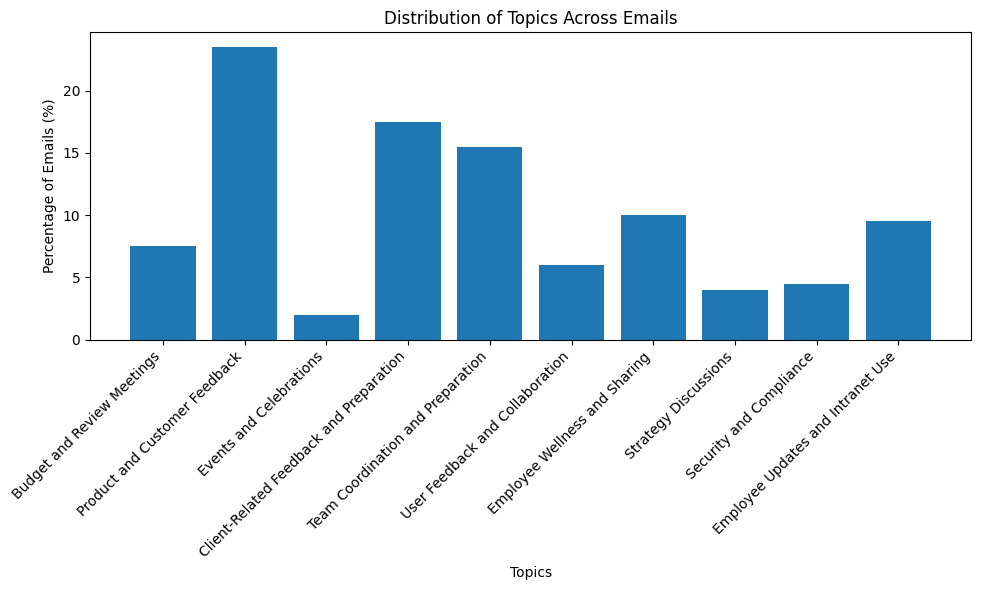

In [ ]:
# Plot topic distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topic_distribution.keys(), topic_distribution.values())
plt.xlabel('Topics')
plt.ylabel('Percentage of Emails (%)')
plt.title('Distribution of Topics Across Emails')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset (already assumed to be in df from previous steps)
texts = df['body'].tolist()

# Convert text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

In [ ]:
# Number of clusters (set to 10 to match LDA topics)
n_clusters = 10

# K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

# EM (Gaussian Mixture Model) Clustering
em = GaussianMixture(n_components=n_clusters, random_state=42)
em_labels = em.fit_predict(tfidf_matrix.toarray())  # Convert to dense array for EM

# Add cluster labels to DataFrame
df['kmeans_cluster'] = kmeans_labels
df['em_cluster'] = em_labels

# Analyze cluster distribution
kmeans_distribution = pd.Series(kmeans_labels).value_counts(normalize=True) * 100
em_distribution = pd.Series(em_labels).value_counts(normalize=True) * 100

K-Means Cluster Distribution (%):
9    14.5
5    12.5
2    11.5
1    10.5
0    10.0
3     9.5
7     9.5
8     9.0
4     9.0
6     4.0
Name: proportion, dtype: float64

EM Cluster Distribution (%):
9    14.5
5    12.5
2    11.5
1    10.5
0    10.0
3     9.5
7     9.5
8     9.0
4     9.0
6     4.0
Name: proportion, dtype: float64


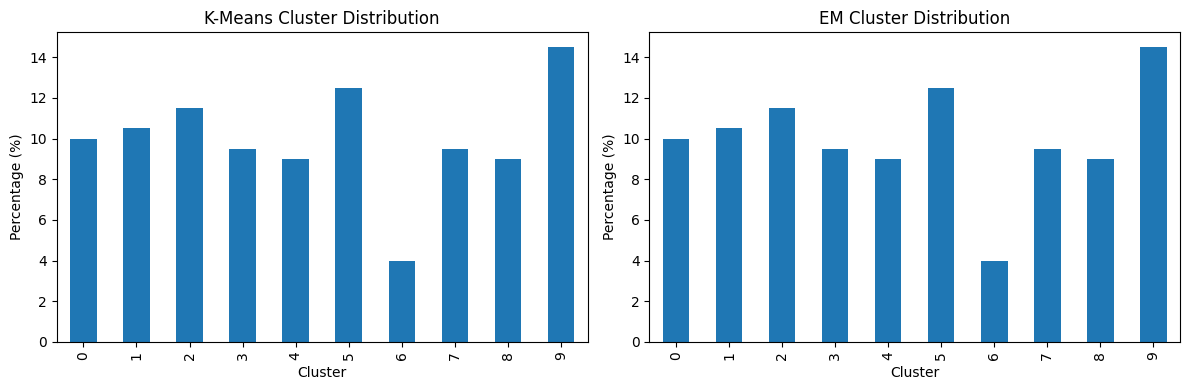

In [ ]:
# Print distributions
print("K-Means Cluster Distribution (%):")
print(kmeans_distribution)
print("\nEM Cluster Distribution (%):")
print(em_distribution)

# Visualize distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
kmeans_distribution.sort_index().plot(kind='bar')
plt.title('K-Means Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')

plt.subplot(1, 2, 2)
em_distribution.sort_index().plot(kind='bar')
plt.title('EM Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

In [ ]:
# Updated function to handle both K-Means and GaussianMixture
def get_top_terms_per_cluster(model, vectorizer, n_terms=5):
    terms = vectorizer.get_feature_names_out()
    clusters = {}
    if hasattr(model, 'cluster_centers_'):  # K-Means
        order_centroids = model.cluster_centers_.argsort()[:, ::-1]
        for i in range(n_clusters):
            top_terms = [terms[ind] for ind in order_centroids[i, :n_terms]]
            clusters[i] = top_terms
    else:  # GaussianMixture
        means = model.means_
        for i in range(n_clusters):
            term_indices = means[i].argsort()[::-1][:n_terms]
            top_terms = [terms[ind] for ind in term_indices]
            clusters[i] = top_terms
    return clusters

# Get top terms per cluster
kmeans_clusters = get_top_terms_per_cluster(kmeans, tfidf_vectorizer)
em_clusters = get_top_terms_per_cluster(em, tfidf_vectorizer)

# Print top terms
print("\nTop Terms per K-Means Cluster:")
for cluster, terms in kmeans_clusters.items():
    print(f"Cluster {cluster}: {terms}")

print("\nTop Terms per EM Cluster:")
for cluster, terms in em_clusters.items():
    print(f"Cluster {cluster}: {terms}")


Top Terms per K-Means Cluster:
Cluster 0: ['marketing', 'strategy', '2026', 'lead', 'hi']
Cluster 1: ['client', 'hi', 'review', 'deliverables', 'focusing']
Cluster 2: ['training', 'survey', 'complete', 'team', 'session']
Cluster 3: ['survey', 'share', 'input', 'office', 'facilities']
Cluster 4: ['details', 'program', 'referral', 'team', 'thank']
Cluster 5: ['security', 'regards', 'safety', 'compliance', 'data']
Cluster 6: ['event', 'let', 'make', 'holiday', 'activities']
Cluster 7: ['wellness', 'hr', 'health', 'employees', 'dear']
Cluster 8: ['performance', 'prepare', 'team', 'customer', 'review']
Cluster 9: ['product', 'features', 'feedback', 'launch', 'team']

Top Terms per EM Cluster:
Cluster 0: ['marketing', 'strategy', '2026', 'lead', 'hi']
Cluster 1: ['client', 'hi', 'review', 'deliverables', 'focusing']
Cluster 2: ['training', 'survey', 'complete', 'team', 'session']
Cluster 3: ['survey', 'share', 'input', 'office', 'facilities']
Cluster 4: ['details', 'program', 'referral', 't

In [ ]:
# Evaluation matrix

from gensim.models.coherencemodel import CoherenceModel
coherence_model_km = CoherenceModel(topics=[kmeans_clusters[i] for i in range(10)], texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_model_em = CoherenceModel(topics=[em_clusters[i] for i in range(10)], texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_score_km = coherence_model_km.get_coherence()
coherence_score_em = coherence_model_em.get_coherence()
print(f"K-Means Coherence Score: {coherence_score_km:.4f}")
print(f"EM Coherence Score: {coherence_score_em:.4f}")

K-Means Coherence Score: 0.7759
EM Coherence Score: 0.7759
